<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib
url, filename = ("https://github.com/scikit-learn/scikit-learn/blob/364c77e047ca08a95862becf40a04fe9d4cd2c98/sklearn/datasets/images/china.jpg?raw=true", "china.jpg")
try: urllib.URLopener().retrieve(url, filename)
except:urllib.request.urlretrieve(url, filename)

In [ ]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.0406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

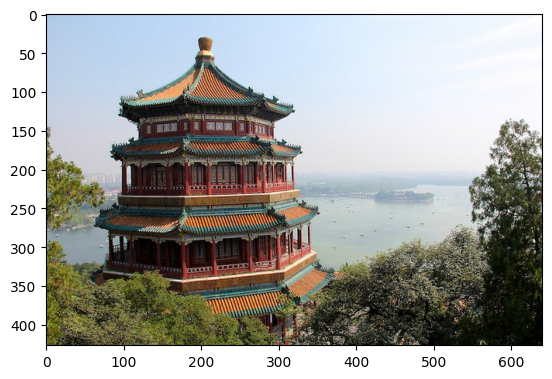

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

In [ ]:
import torchvision.models as models
vgg16 = models.vgg16()
alexnet = models.alexnet()

In [ ]:
model_pretrained = models.vgg16(weights='IMAGENET1K_V1')
model_pretrained.eval()

output = model_pretrained(input_batch)
print(output.shape)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 76.4MB/s]


torch.Size([1, 1000])


In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-05-30 07:13:38--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-05-30 07:13:38 (24.1 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



In [ ]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [ ]:
import torchvision.models as models
vgg16= models.vgg16(weights='IMAGENET1K_V1') 
vgg16 = models.alexnet(weights=None)

In [ ]:
import torch
_, index = torch.max(output, 1)
percentage = torch.nn.functional.softmax(output, dim=1)[0]*100
print(classes[index[0]], percentage[index[0]].item())

palace 61.96012496948242


In [ ]:
print("2110147 우정은")

2110147 우정은


In [ ]:
_, indices = torch.sort(output, descending = True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('palace', 61.96012496948242),
 ('bell cote', 31.998226165771484),
 ('monastery', 2.44685959815979),
 ('church', 0.9253892302513123),
 ('boathouse', 0.9196276068687439)]